# 랜덤 포레스트

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from pandas.core.common import random_state
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## 데이터 불러오기

In [3]:
data = pd.read_csv('/content/drive/MyDrive/health/data/data_dis01.csv')
df = data.copy()
df

,SEX,BTH_G,SBP,DBP,FBS,DIS,BMI,B_pressure,B_sugar
0,0,1,116,78,94,4,16.6,0,0
1,0,1,100,60,79,4,22.3,0,0
2,0,1,100,60,87,4,21.9,0,0
3,0,1,111,70,72,4,20.2,0,0
4,0,1,120,80,98,4,20.0,0,0
...,...,...,...,...,...,...,...,...,...
999995,1,27,120,70,81,2,23.1,1,0
999996,1,27,110,70,104,2,27.2,1,0
999997,1,27,115,53,110,1,25.2,1,1
999998,1,27,120,70,90,2,19.7,1,0


In [4]:
data.corr()

,SEX,BTH_G,SBP,DBP,FBS,DIS,BMI,B_pressure,B_sugar
SEX,1.000000,0.085226,-0.168796,-0.190420,-0.101150,-0.004797,-0.170833,0.002512,-0.017857
BTH_G,0.085226,1.000000,0.275981,0.134484,0.213951,-0.478049,0.088089,0.485767,0.272609
SBP,-0.168796,0.275981,1.000000,0.743006,0.186501,-0.310757,0.304383,0.303971,0.122485
DBP,-0.190420,0.134484,0.743006,1.000000,0.138717,-0.193525,0.275492,0.192310,0.045992
FBS,-0.101150,0.213951,0.186501,0.138717,1.000000,-0.315935,0.173688,0.334131,0.476563
DIS,-0.004797,-0.478049,-0.310757,-0.193525,-0.315935,1.000000,-0.200107,-0.944799,-0.544961
BMI,-0.170833,0.088089,0.304383,0.275492,0.173688,-0.200107,1.000000,0.194889,0.103408
B_pressure,0.002512,0.485767,0.303971,0.192310,0.334131,-0.944799,0.194889,1.000000,0.552340
B_sugar,-0.017857,0.272609,0.122485,0.045992,0.476563,-0.544961,0.103408,0.552340,1.000000


In [5]:
# 혈압, 혈당 진료여부 삭제
df.drop(['DIS'], axis=1, inplace=True)

# sample, head, tail을 통해 데이터를 미리보기 합니다.
df.head()

,SEX,BTH_G,SBP,DBP,FBS,BMI,B_pressure,B_sugar
0,0,1,116,78,94,16.6,0,0
1,0,1,100,60,79,22.3,0,0
2,0,1,100,60,87,21.9,0,0
3,0,1,111,70,72,20.2,0,0
4,0,1,120,80,98,20.0,0,0


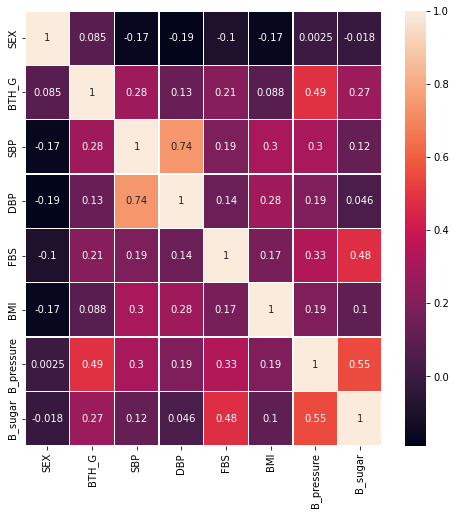

In [6]:
plt.figure(figsize=(8,8))
sns.heatmap(data=df.corr(),annot=True,linewidths=.5) # 상관계수 : 기본이 피어슨 상관계수 사용

**feature**
- B_pressure : 고혈압
- B_sugar : 당뇨
- SBP : 수축기혈압
- DBP : 이완기혈압
- FBS : 공복혈당
  - BTH_G : 연령(그룹) : ?


```
BTH_G : 연령(그룹)
SBP : 수축기혈압
DBP : 이완기혈압
FBS : 공복혈당
SEX : 성별(남성:1, 여성:2)
DIS : 고혈압/당뇨병 진료여부
고혈압/당뇨병 진료내역 있음: 1
고혈압 진료내역 있음: 2
당뇨병 진료내역 있음: 3
고혈압/당뇨병 진료내역 없음: 4
BMI : 체질량지수
```



In [7]:
# 결측치 처리
# 사용 데이터에는 결측치 없음

# presd = data.replace({'pres':0},{'pres':None})
# presd1 = presd.dropna()
# presd = data.replace({'pres':0},{'pres':None})
# presd = presd.fillna(presd1.pres.median())

# massd = presd.replac({'mass':0},{'mass':None})
# massd1 = massd.dropna()
# massd = data.replace({'mass':0},{'mass':None})
# massd = massd.fillna(massd1.mass.median())

# plasd = massd.replace({'pres':0},{'pres':None})
# plasd1 = plasd.dropna()
# data = plasd.fillna(plasd1.pres.median())

# col = list(map(str,data.columns))
# x = data[col[:-1]]
# y = data[col[:-1]]
# print(x,y)

In [ ]:
# # 데이터에서 정답 클래스 분리
# col=list(map(str,df.columns))
# x = df[col[:-1]]
# y = df[col[-1]]
# print(x,y)

In [13]:
# feature와 target 분리
y = np.array(df['B_pressure'])
x = df.drop(['B_pressure'], axis=1)
x_train=np.array(x)
print(x,y)

# 데이터 정규화
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)

# train test 데이터 split
# test_size=0.2, random_state=42
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)

        SEX  BTH_G  SBP  DBP  FBS   BMI  B_sugar
0         0      1  116   78   94  16.6        0
1         0      1  100   60   79  22.3        0
2         0      1  100   60   87  21.9        0
3         0      1  111   70   72  20.2        0
4         0      1  120   80   98  20.0        0
...     ...    ...  ...  ...  ...   ...      ...
999995    1     27  120   70   81  23.1        0
999996    1     27  110   70  104  27.2        0
999997    1     27  115   53  110  25.2        1
999998    1     27  120   70   90  19.7        0
999999    1     27  116   73   92  17.6        0

[1000000 rows x 7 columns] [0 0 0 ... 1 1 0]


---

In [14]:
# df를 train/validation/test set으로 나누기
# 전체 데이터에서 학습데이터셋과 테스트셋을 나눔
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)

# train set에서 train과 validation set를 나눔
x_test,x_val,y_test,y_val=train_test_split(x_test,y_test,test_size=0.5)


print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(600000, 7)
(600000,)
(200000, 7)
(200000,)
(200000, 7)
(200000,)


In [15]:
# 랜덤포레스트 without tuning
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
forest_predictions = rf.predict(x_test)

accuracy_score(y_test, forest_predictions)
forest_predictions = rf.predict(x_test)

In [16]:
# 데이터 100만 개 사용
print(confusion_matrix(y_test, forest_predictions))

[[138252   9921]
 [ 20452  31375]]


In [17]:
rf = RandomForestClassifier(n_estimators=100, random_state=0).fit(x_train,y_train)

print("train score : {}".format(rf.score(x_train, y_train)))
print("val score : {}".format(rf.score(x_val, y_val)))

#print("test score : {}".format(dTree.score(x_test,y_test)))
predict_y = rf.predict(x_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(x_test)))
print("test score : {}".format(rf.score(x_test, y_test)))

train score : 0.997015
val score : 0.848595
              precision    recall  f1-score   support

           0       0.87      0.93      0.90    148173
           1       0.76      0.60      0.67     51827

    accuracy                           0.85    200000
   macro avg       0.82      0.77      0.79    200000
weighted avg       0.84      0.85      0.84    200000

test score : 0.848145


---

In [ ]:
# import tensorflow as tf

# model=tf.keras.models.Sequential([
#                                   tf.keras.layers.Dense(32,kernel_initializer="normal", activation = "relu"),
#                                   tf.keras.layers.Dense(256,kernel_initializer="normal", activation = "relu"),
#                                   tf.keras.layers.Dense(512,kernel_initializer="normal", activation = "relu"),
#                                   tf.keras.layers.Dense(512,kernel_initializer="normal", activation = "relu"),
#                                   tf.keras.layers.Dense(512,kernel_initializer="normal", activation = "relu"),
#                                   tf.keras.layers.Dense(128,kernel_initializer="normal", activation = "relu"),
#                                   tf.keras.layers.Dense(64,kernel_initializer="normal", activation = "relu"),
#                                   tf.keras.layers.Dropout(rate=0.5),
#                                   tf.keras.layers.Dense(1,kernel_initializer="normal", activation = "relu"),
# ])

# model.compile(loss='mean_squared_error',
#               optimizer='adam',
#               metrics=['MeamSquaredError'])

# model.fit(x_train,y_train,epochs=100, batch_size=32, validation_split=0.2)

In [ ]:
# prediction = model.pred(presdf)
# prediction

---

In [ ]:
# dTree = DecisionTreeClassifier(max_depth=3,random_state=0).fit(x_train,y_train)

# print("train score : {}".format(rf.score(x_train, y_train)))
# print("val score : {}".format(rf.score(x_val, y_val)))

# #print("test score : {}".format(dTree.score(x_test,y_test)))
# predict_y = rf.predict(x_test)

# from sklearn.metrics import classification_report
# print(classification_report(y_test, rf.predict(x_test)))
# print("test score : {}".format(rf.score(x_test, y_test)))

In [ ]:
# import graphviz
# from sklearn.tree import export_graphviz

# export_graphviz(dTree, out_file='tree.dot', class_names=['0','1'], feature_names=df.columns[:-1], impurity=False, filled=True)
# with open('tree.dot') as file_reader:
#   dot_graph = file_reader.read()

# dot = graphviz.Source(dot_graph)
# dot.render(filename='tree.png')